In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/Gladiator07/Harvestify/master/Data-processed/crop_recommendation.csv')
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [3]:
data=df

In [4]:
y=data['label']
X=data.drop(columns='label')

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 42)

In [6]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name
class_name

['mango',
 'maize',
 'banana',
 'rice',
 'mothbeans',
 'apple',
 'kidneybeans',
 'lentil',
 'chickpea',
 'cotton',
 'pigeonpeas',
 'muskmelon',
 'grapes',
 'mungbean',
 'blackgram',
 'coffee',
 'orange',
 'pomegranate',
 'jute',
 'coconut',
 'watermelon',
 'papaya']

In [8]:
clf.score(x_train,y_train)

1.0

In [9]:
py_pred = clf.predict(x_test)

In [10]:
clf.score(x_test,y_test)

0.9863636363636363

In [11]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,6,1),
    'min_samples_split': range(2,5,1),
    'splitter' : ['best', 'random']
}

In [12]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [13]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [14]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [15]:
grid_search.best_score_

0.9824675324675326

In [16]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [17]:
clf.score(x_test,y_test)

0.9590909090909091

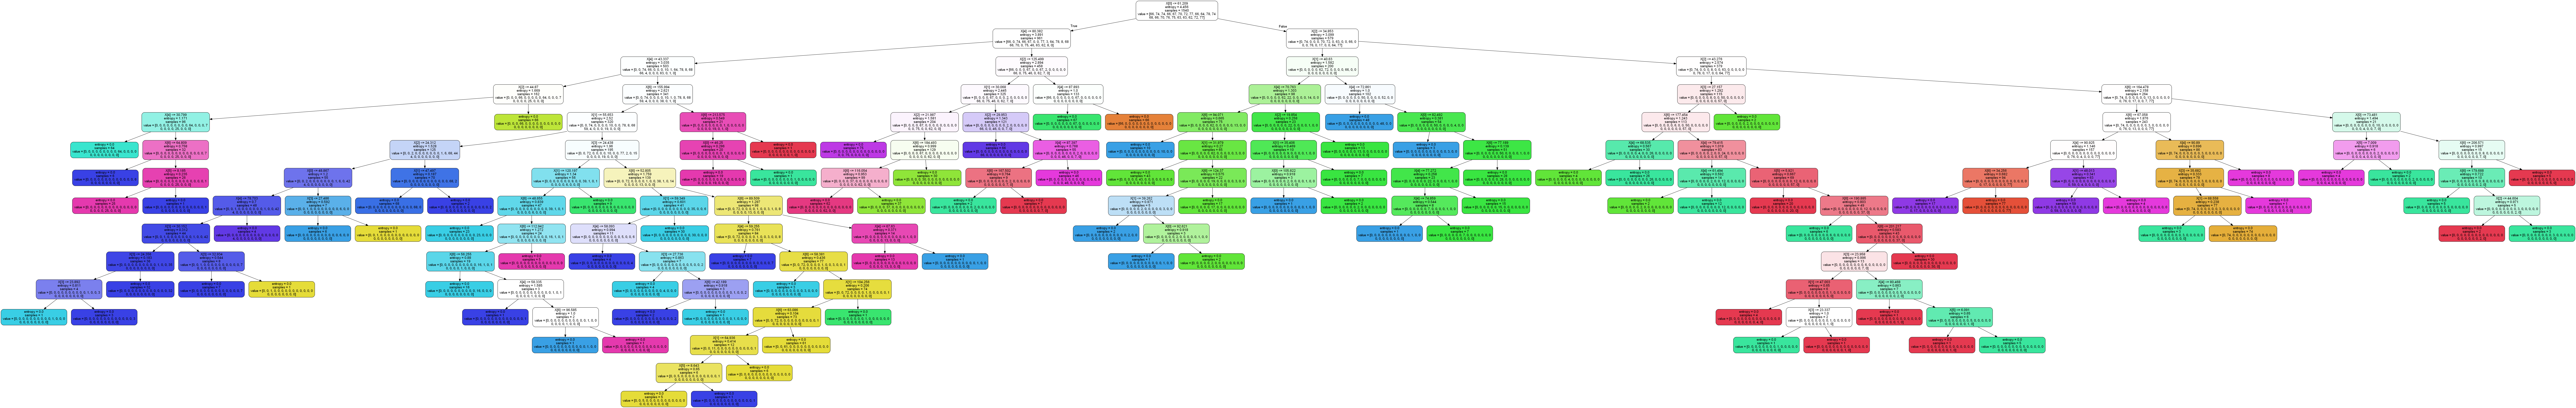

In [18]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

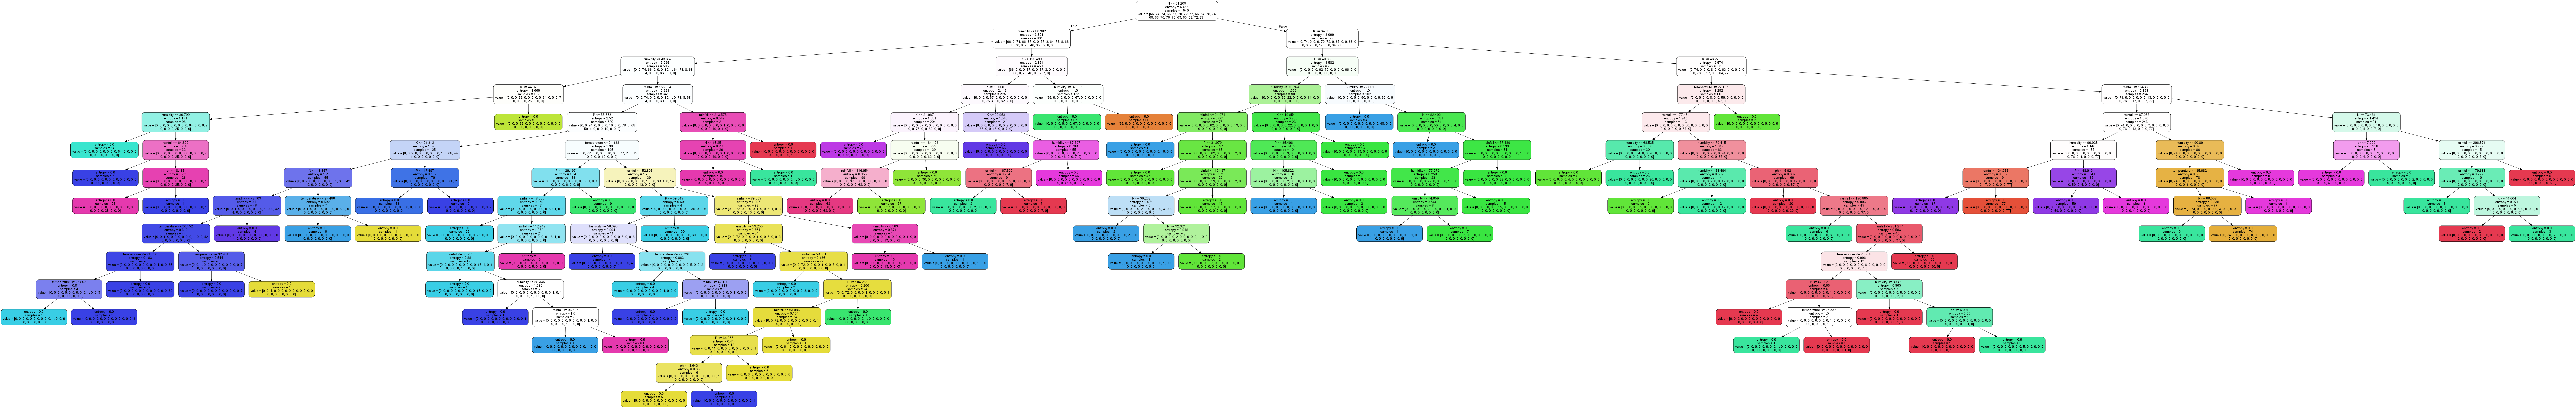

In [34]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree1.png")
# Show graph
Image(graph.create_png())

In [33]:
clf.predict([[58,46,45,42.394134,90.790281,6.576261,88.466075]])

array(['papaya'], dtype=object)

In [32]:
df[df['label']=='papaya']

N   P   K  temperature   humidity        ph    rainfall   label
1700  61  68  50    35.214628  91.497251  6.793245  243.074507  papaya
1701  58  46  45    42.394134  90.790281  6.576261   88.466075  papaya
1702  45  47  55    38.419163  91.142204  6.751453  119.265388  papaya
1703  39  65  53    35.332949  92.115086  6.560743  235.613359  papaya
1704  31  68  45    42.923253  90.076005  6.938313  196.240824  papaya
...   ..  ..  ..          ...        ...       ...         ...     ...
1795  42  59  55    40.102077  94.351102  6.979102  149.119999  papaya
1796  43  64  47    38.589545  91.580765  6.825665  102.270823  papaya
1797  35  67  49    41.313301  91.150880  6.617067  239.742755  papaya
1798  56  59  55    37.035519  91.794302  6.551893  188.518142  papaya
1799  39  64  53    23.012402  91.073555  6.598860  208.335798  papaya

[100 rows x 8 columns]